# Recitation 2: Matplotlib and Seaborn

(c) 2017 James McGehee. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT).

*This tutorial was generated from an Jupyter notebook.  You can download the notebook [here](aux2_matplotlib_and_seaborn.ipynb).*

There are several plotting packages for Python, and we have already covered using [Bokeh](https://bokeh.pydata.org) and [Holoviews](http://holoviews.org/) in previous tutorials. In this tutorial, we will cover [Matplotlib](https://matplotlib.org) and [Seaborn](https://seaborn.pydata.org). As usual, we begin with importing the modules we will use.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import holoviews as hv
import bebi103

hv.extension('matplotlib')
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

/Users/Justin/anaconda3/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


It is important to note that we must include the first magic function so that our plots display in the notebook. The second magic function will make our plots look sharp.

We will use the frog data that we explored in [Tutorial 2b](http://bebi103.caltech.edu.s3-website-us-east-1.amazonaws.com/2017/tutorials/t2b_exploratory_data_analysis.html). The data set can be downloaded [here](http://bebi103.caltech.edu.s3-website-us-east-1.amazonaws.com/2017/data/frog_tongue_adhesion.csv). As in the week wee of tutorials, we'll add the additional metadata to the main data frame.

In [2]:
df_frog = pd.read_csv('../data/frog_tongue_adhesion.csv', comment='#')

# Populate metadata
data_dict = {'ID': ['I', 'II', 'III', 'IV'],
             'age': ['adult', 'adult', 'juvenile', 'juvenile'],
             'SVL (mm)': [63, 70, 28, 31],
             'weight (g)': [63.1, 72.7, 12.7, 12.7],
             'species': ['cross', 'cross', 'cranwelli', 'cranwelli']}
df_frog_info = pd.DataFrame(data=data_dict)
df_frog = df_frog.merge(df_frog_info)

# Take a quick look at the data frame
df_frog.head()

,date,ID,trial number,impact force (mN),impact time (ms),impact force / body weight,adhesive force (mN),time frog pulls on target (ms),adhesive force / body weight,adhesive impulse (N-s),total contact area (mm2),contact area without mucus (mm2),contact area with mucus / contact area without mucus,contact pressure (Pa),adhesive strength (Pa),SVL (mm),age,species,weight (g)
0,2013_02_26,I,3,1205,46,1.95,-785,884,1.27,-0.290,387,70,0.82,3117,-2030,63,adult,cross,63.1
1,2013_02_26,I,4,2527,44,4.08,-983,248,1.59,-0.181,101,94,0.07,24923,-9695,63,adult,cross,63.1
2,2013_03_01,I,1,1745,34,2.82,-850,211,1.37,-0.157,83,79,0.05,21020,-10239,63,adult,cross,63.1
3,2013_03_01,I,2,1556,41,2.51,-455,1025,0.74,-0.170,330,158,0.52,4718,-1381,63,adult,cross,63.1
4,2013_03_01,I,3,493,36,0.80,-974,499,1.57,-0.423,245,216,0.12,2012,-3975,63,adult,cross,63.1


## Plotting with matplotlib.pyplot

Notice in the import statements above, we imported `matplotlib.pyplot` as `plt`, which is the conventional abbreviation for the PyPlot submodule of Matplotlib. It has most of the functionality you will need with Matplotlib.

As our first plot, we will try a scatter plot of impact force versus adhesive force. We just pass in the values we want for *x* and *y*.

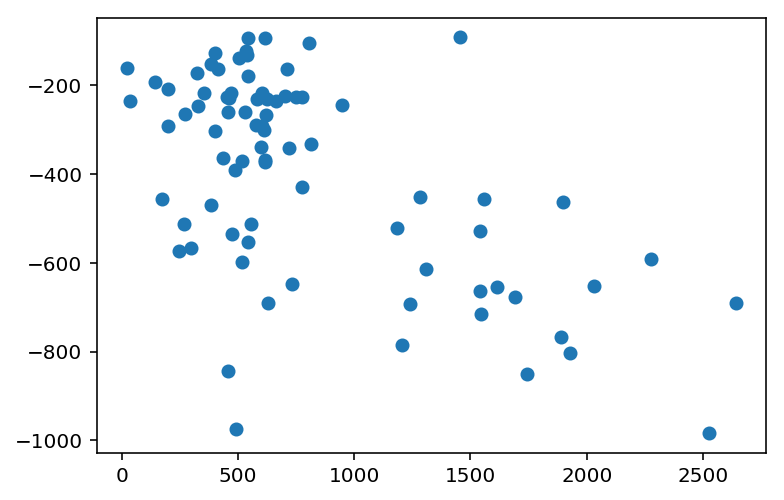

In [3]:
plt.scatter(df_frog['impact force (mN)'],
            df_frog['adhesive force (mN)']);

This plot looks okay, but let's see if we can make it look better and label the plot. We will change the size of the figure, add labels, add a title, and turn on grid lines. We will also change the color using the color kwarg.

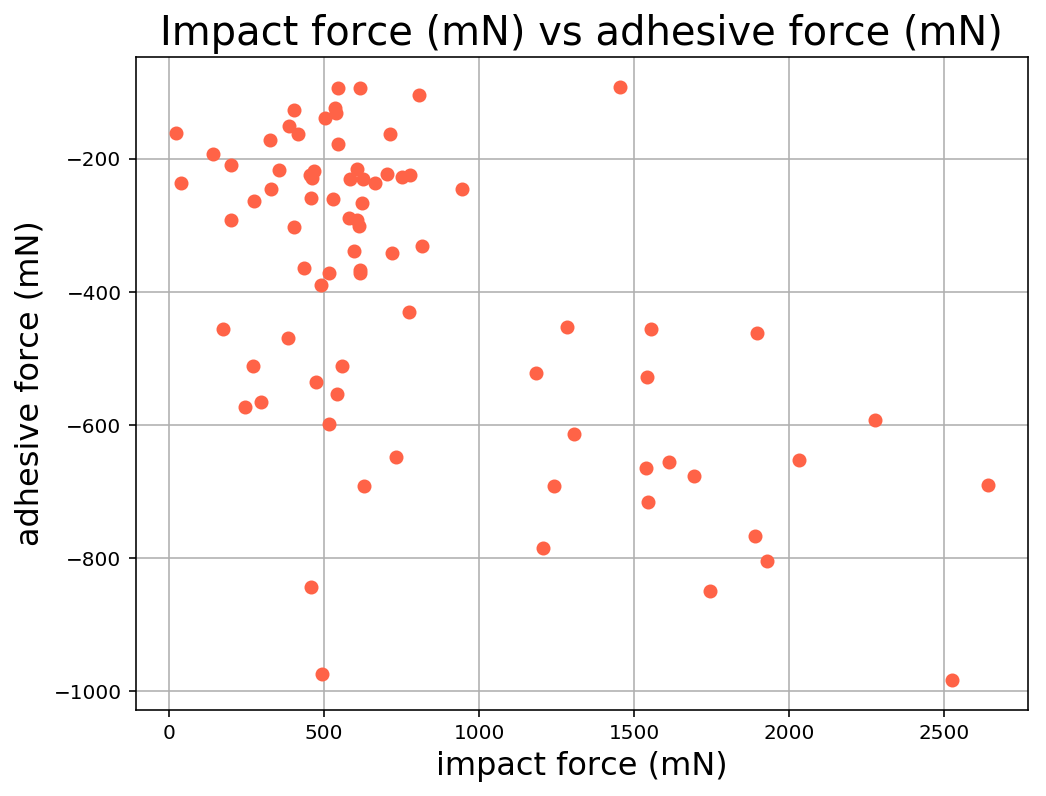

In [4]:
# Set up a figure with axes
fig, ax = plt.subplots(1, 1)

# Set the size of the figure
fig.set_size_inches(8, 6)

# Add a grid and make sure it is behind our data points
ax.grid(b=True)
ax.set_axisbelow(b=True)

# Label the axes and title the plot
ax.set_xlabel('impact force (mN)', size = 16)
ax.set_ylabel('adhesive force (mN)', size = 16)
ax.set_title('Impact force (mN) vs adhesive force (mN)', size = 20)

# Make a scatter plot
ax.scatter(df_frog['impact force (mN)'],
           df_frog['adhesive force (mN)'],
           color='tomato');

To make all our plots have the same properties, we can use the rc settings in Matplotlib. Note that all subsequent plots will have these settings. We will set the figure size, add grid lines, ensure that the grid lines are behind the data, and set the font size.

In [5]:
# Set the figure size
plt.rc('figure', figsize=[8, 6])

# Make a dictionary of properties changing the axes
rc = {'grid': True,
      'axisbelow': True,
      'labelsize': 16, 
      'titlesize': 20}

# Set the axes properties defined in our dictionary
plt.rc('axes', **rc)

We can also make a scatter plot using the plot command, and change the marker style to a dot and line style to `'none'`, but we also have to adjust the marker size.

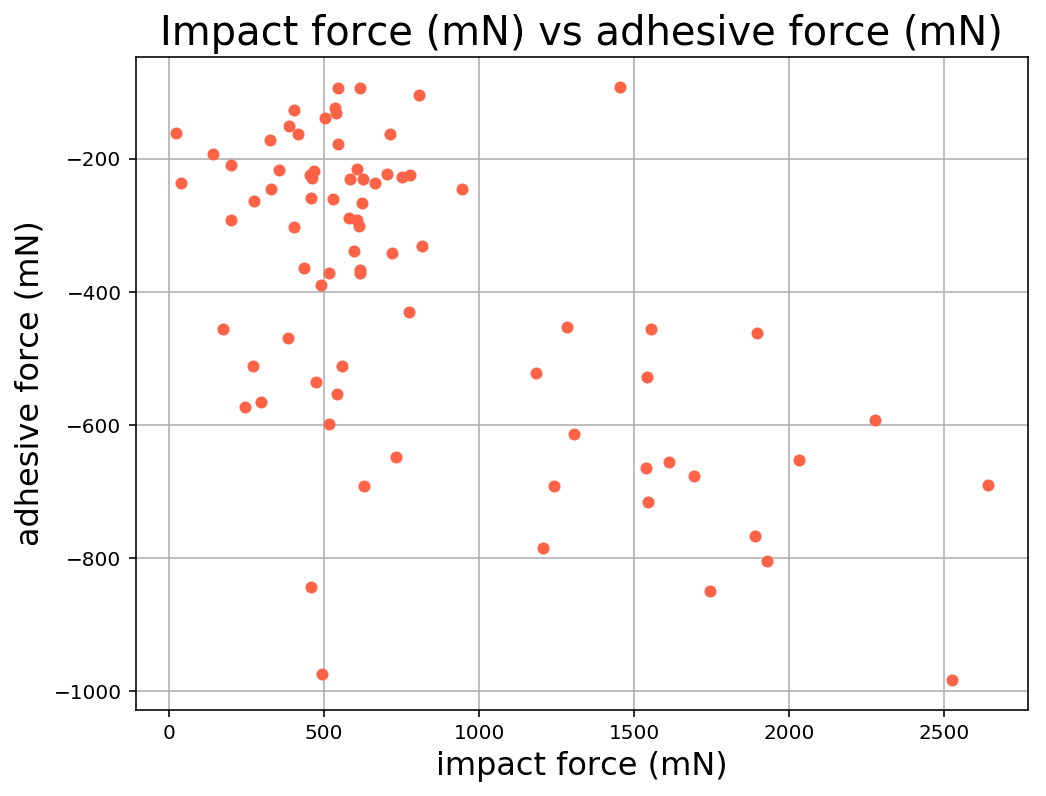

In [6]:
# Set up a figure with axes
fig, ax = plt.subplots(1, 1)

# Label the axes and title the plot
ax.set_xlabel('impact force (mN)')
ax.set_ylabel('adhesive force (mN)')
ax.set_title('Impact force (mN) vs adhesive force (mN)')

# Make a scatter plot
ax.plot(df_frog['impact force (mN)'],
        df_frog['adhesive force (mN)'],
        marker='.',
        linestyle='none',
        color='tomato',
        markersize=10);

## Seaborn: a high level plotting package for Matplotlib

We can use a package for high level plotting with Matplotlib called Seaborn. Seaborn has a lot of features and different plots, including scatter plots, box and whisker plots, strip plots, swarm plots, and more. We'll try a box and whisker plot, strip plot, and swarm plot. For a box plot (and all the plotting tools we'll explore in Seaborn), similar to HoloViews, we pass in the tidy data frame and the columns that contain the categories and the values we want to plot. We'll use the frog ID and look at the impact force.

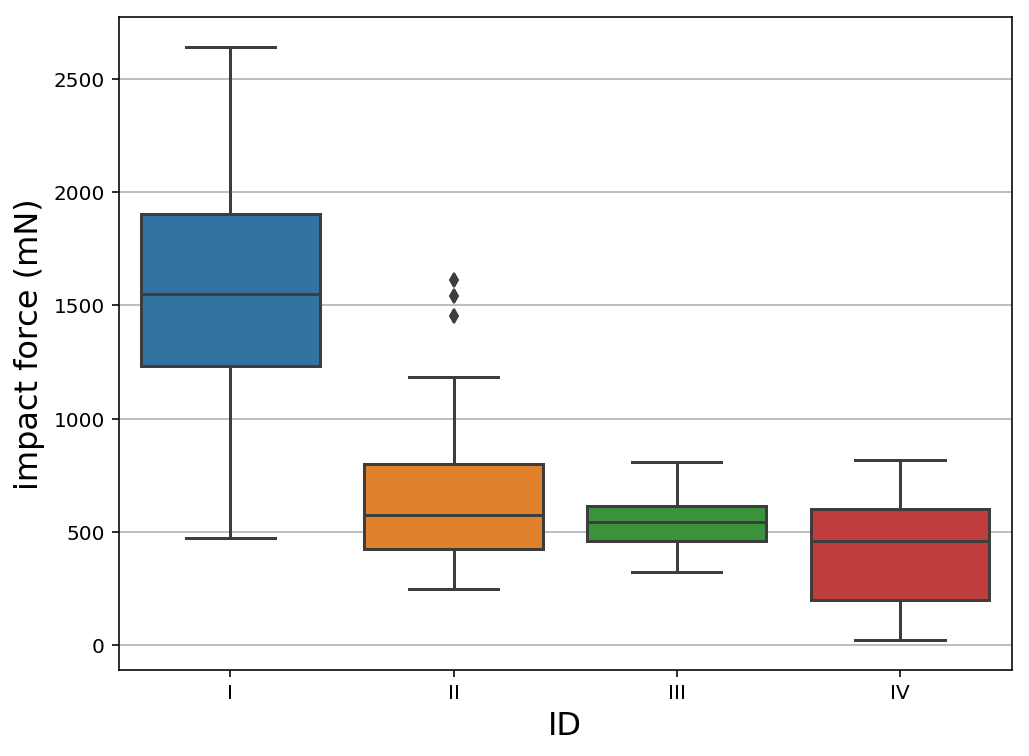

In [9]:
sns.boxplot(data=df_frog,
            x='ID',
            y='impact force (mN)');

Just as before, we can use `rc` to set the properties of all our figures. It is important to note that the settings we defined earlier are still in effect unless we overwrite them.

In [12]:
#Set plot attributes for all subsequent plots
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18}

# Seaborn allows for easier contextual and style settings
sns.set_context('notebook', rc=rc)
sns.set_style('whitegrid', rc=rc)

Not a whole lot will change, but the font is larger on the labels, lines are thicker, and the whitegrid style has changed the appearance of the grid and ticks, as we can see below.

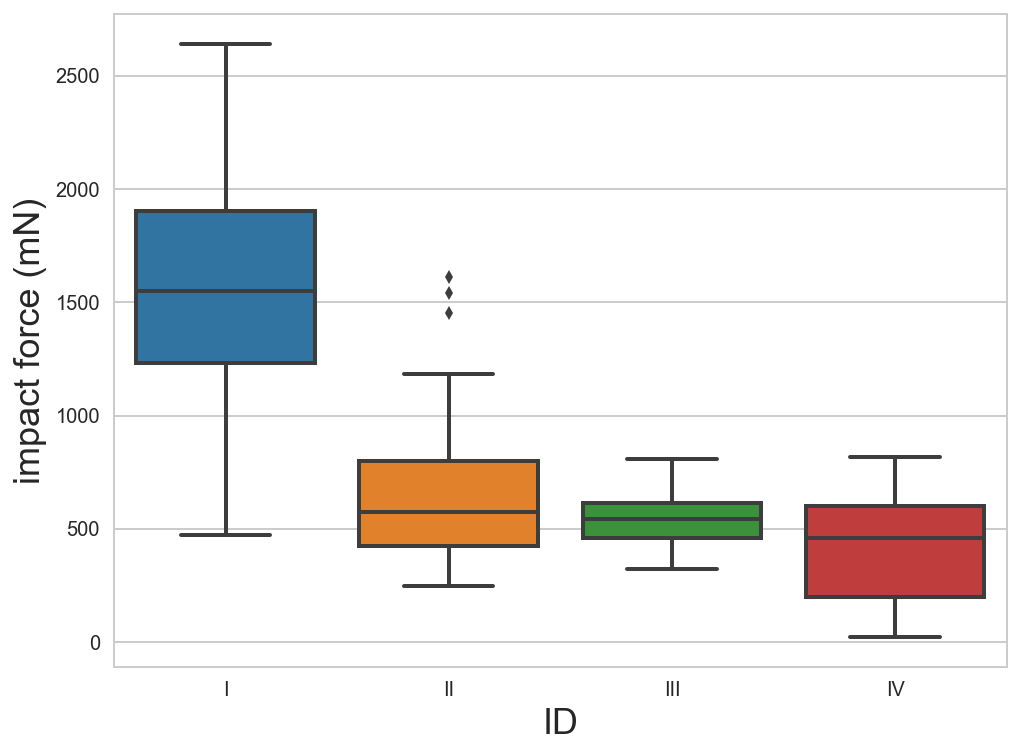

In [14]:
sns.boxplot(data=df_frog,
            x='ID',
            y='impact force (mN)');

We can also make a jitter plot of this same data. To make a jitter plot, we will use `sns,stripplot()`. A strip plot is essentially the same as a scatter plot where one variable is categorical. Without jitter the data appears in a single line and the points overlap. We could change transparency to get an idea of the density of points but instead we will use jitter, which offsets the points slightly. We could combine jitter and transparency but that isn't necessary for this data set. To change how far the points are spread, we can pass a value to jitter instead of specifying it as true. You can play with the different vales of jitter but for this example simply setting jitter to true is fine.

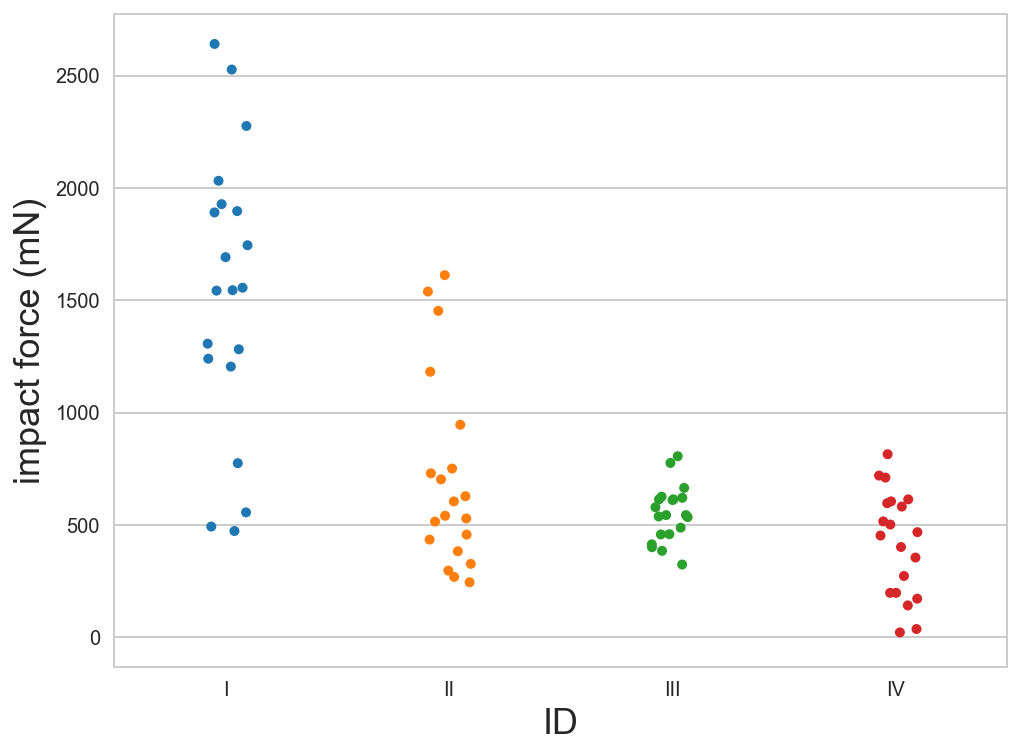

In [15]:
sns.stripplot(data=df_frog,
              x='ID',
              y='impact force (mN)',
              jitter=True);

If we want to overlay our jitter plot on our box and whisker plot, we just plot both the box and jitter plots. To easily see the points, I changed the boxes to a light gray color. Note that this set all the boxes to the same color.

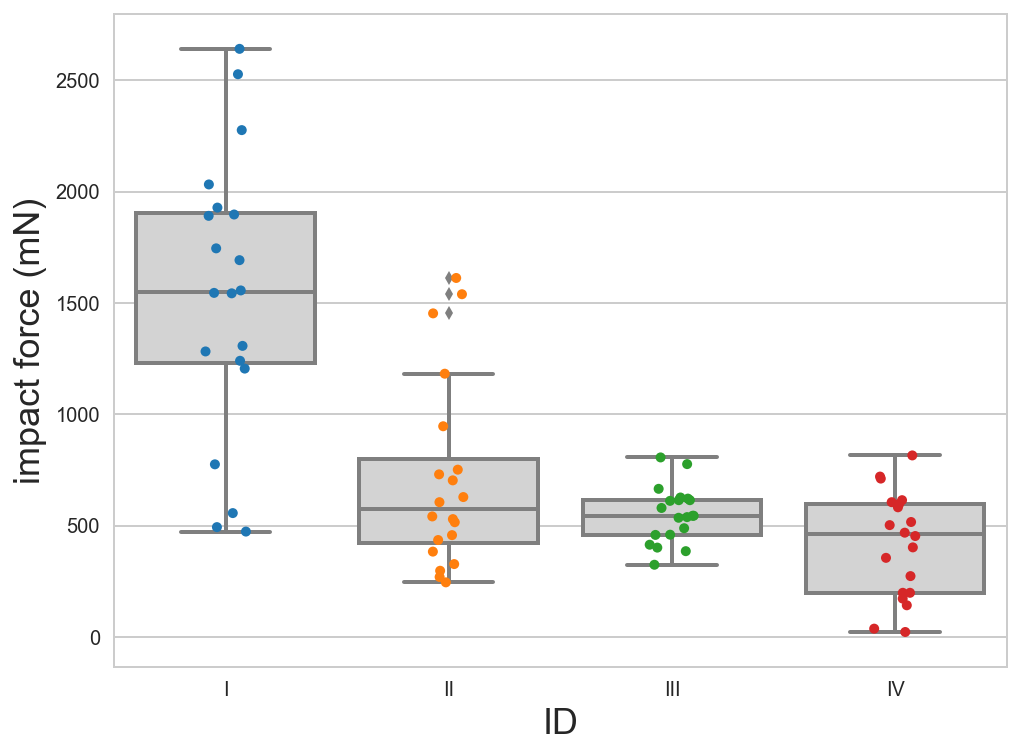

In [16]:
sns.boxplot(data=df_frog,
            x='ID',
            y='impact force (mN)',
            color='lightgray')

sns.stripplot(data=df_frog,
              x='ID',
              y='impact force (mN)',
              jitter=True);

This is nice, although we could play with the colors more if we wanted to improve the appearance of the plot. 

Instead of a jitter plot, we can plot a swarm plot, which plots the points with no overlap and reveals which data occur more often.

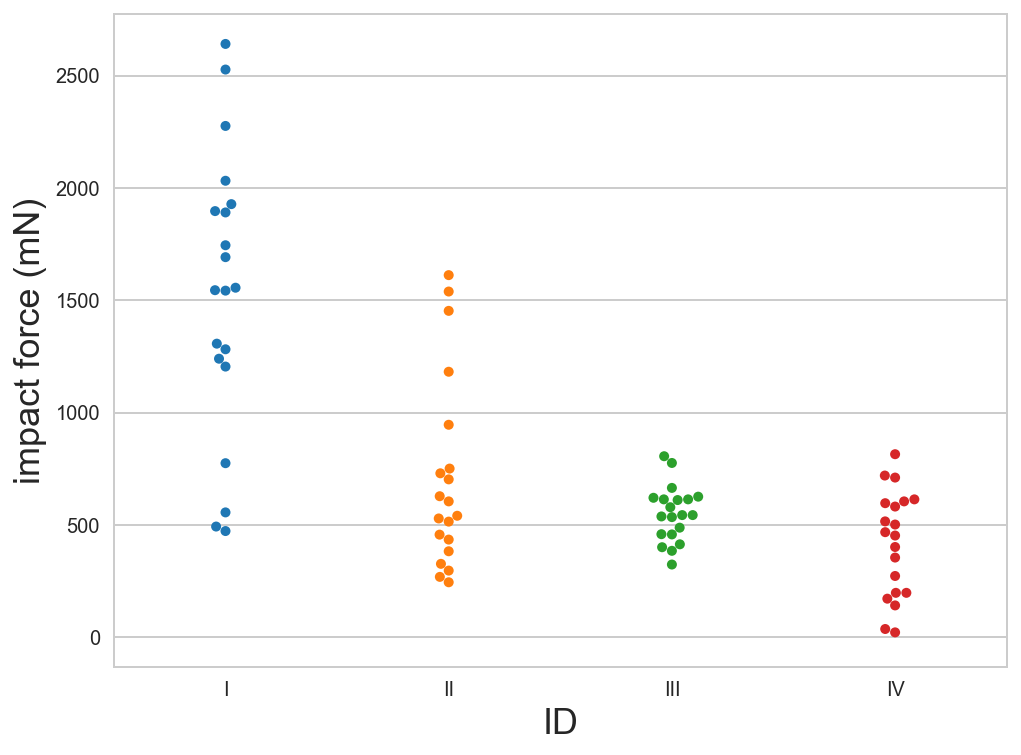

In [17]:
sns.swarmplot(data=df_frog,
              x='ID',
              y='impact force (mN)');

And once again we can overlay a swarm plot and boxplot.

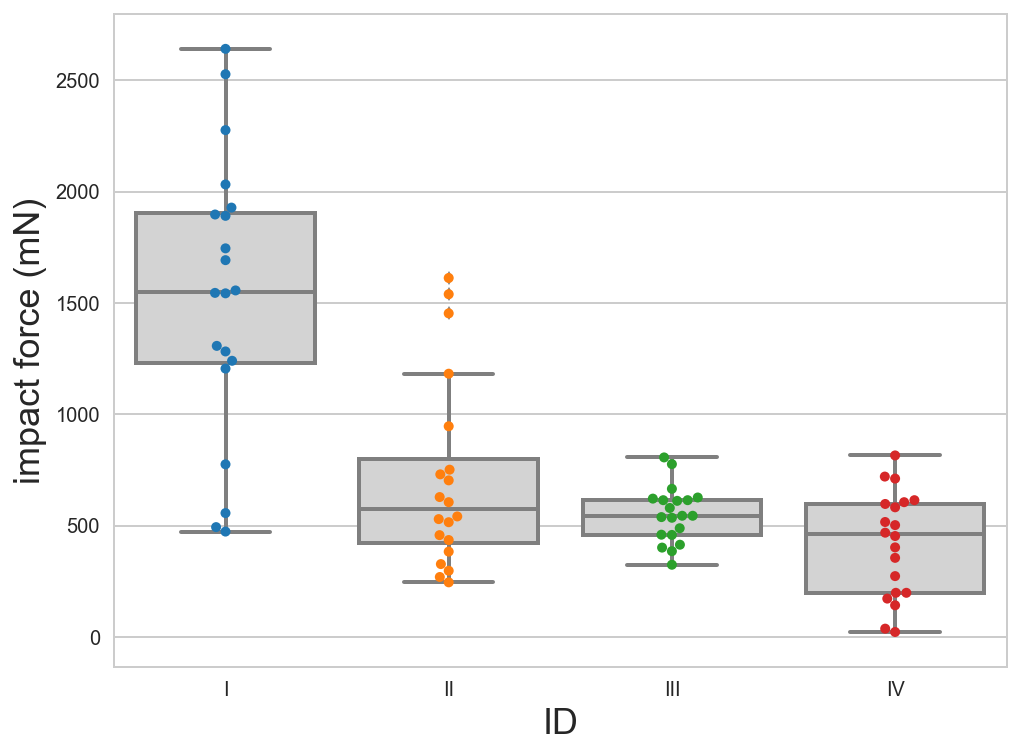

In [18]:
sns.boxplot(data=df_frog,
            x='ID',
            y='impact force (mN)',
            color='lightgray')

sns.swarmplot(data=df_frog,
              x='ID',
              y='impact force (mN)');

It may not be clear what the differences between a swarm plot and jitter plot are from this data set, which has a relatively small number of data points. To highlight these differences, as well as to show you how to make subplots, I will plot random values pulled from two Gaussian distributions with different means and standard deviations.

In [19]:
# Make random arrays by sampling a gaussian
n1 = 200
n2 = 400
y1 = np.random.normal(loc=5, size=n1)
y2 = np.random.normal(loc=10, scale=3, size=n2)

# Make an array to group the values
x1 = 5 * np.ones(n1)
x2 = 10 * np.ones(n2)

# Combine the sampled data together
x = np.concatenate((x1,x2),axis=0)
y = np.concatenate((y1,y2),axis=0)

Now that I have sampled from a Gaussian, we can plot both the jitter and swarm plots. To do this we will use subplot. We can set the figure size, and then this will size our subplots based on number of rows and columns. For subplots, we specify the number of rows and the number of columns. We then specify which axes we want to plot to. Below is an example of subplot with one row and two columns. To specify which axes we want, we pass the axes to Seaborn in the respective plotting command.

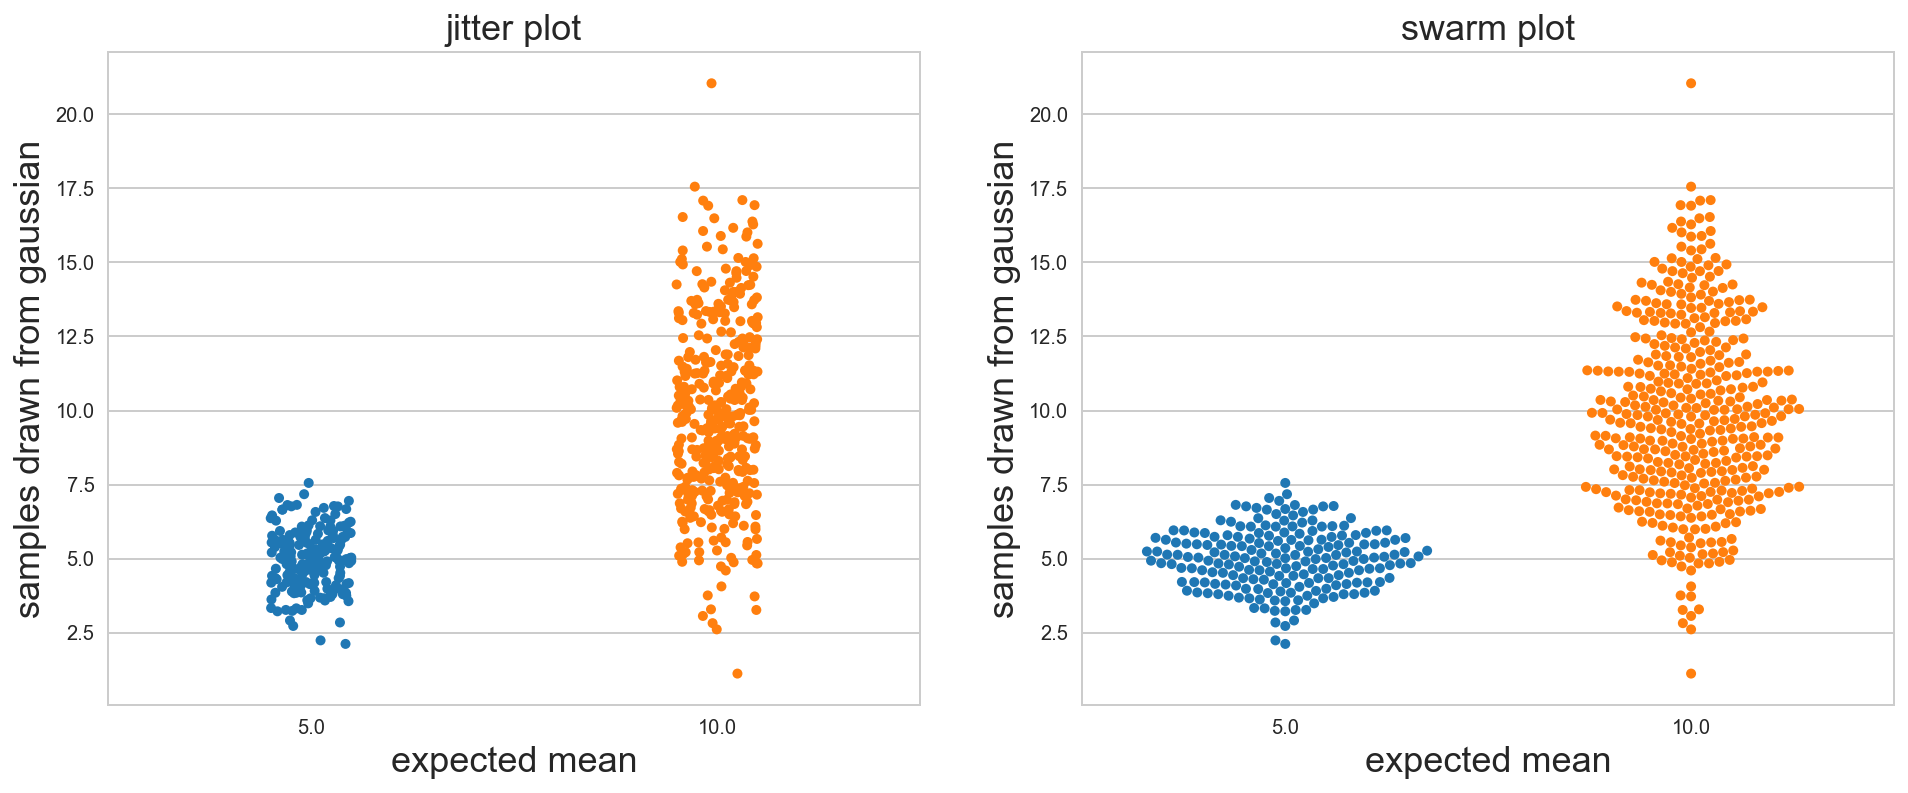

In [21]:
# Set up a figure with two axes
fig, ax = plt.subplots(1, 2)

# Set the size of the figure
fig.set_size_inches(16, 6)

# Label the axes and title the plot
ax[0].set_xlabel('expected mean')
ax[0].set_ylabel('samples drawn from gaussian')
ax[0].set_title('jitter plot')

# Make a jitter plot
sns.stripplot(x, y, ax=ax[0], jitter=True)

# Label the axes and title the plot
ax[1].set_xlabel('expected mean')
ax[1].set_ylabel('samples drawn from gaussian')
ax[1].set_title('swarm plot')

# Make a swarm plot
sns.swarmplot(x, y, ax=ax[1]);

Here we can clearly see the power of a swarm plot over a jitter plot. In the jitter plot we have no indication of the density of the data. We can try to improve the jitter plot by increasing the amount of jitter or by adding transparency. Let's try both.

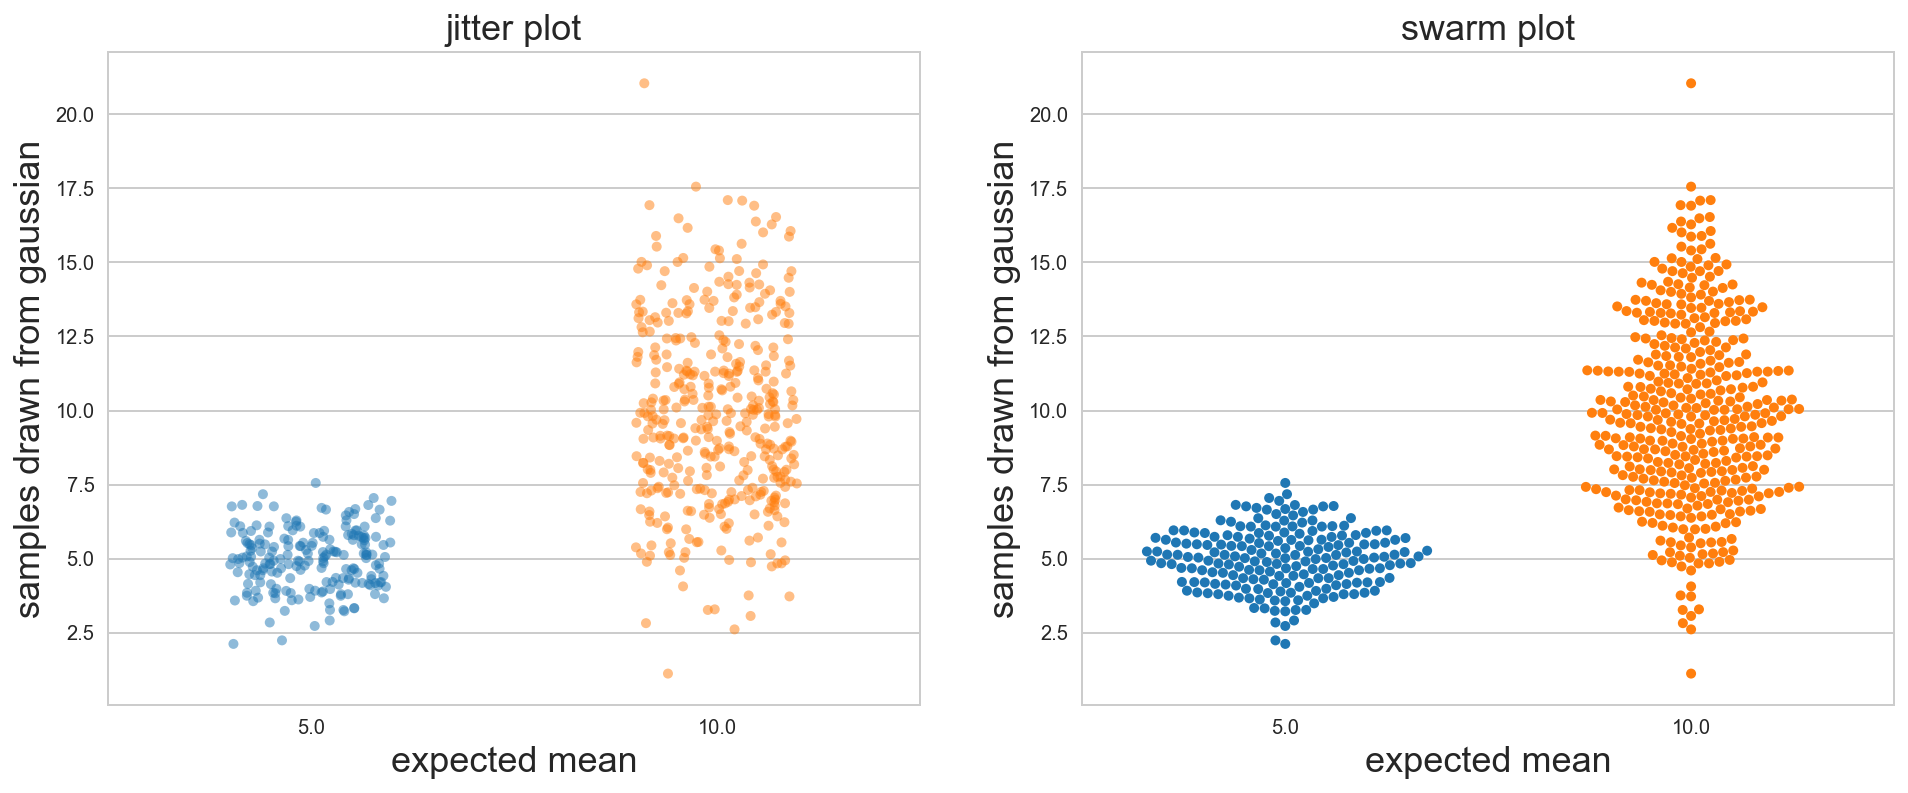

In [23]:
# Set up a figure with two axes
fig, ax = plt.subplots(1, 2)

# Set the size of the figure
fig.set_size_inches(16, 6)

# Label the axes and title the plot
ax[0].set_xlabel('expected mean')
ax[0].set_ylabel('samples drawn from gaussian')
ax[0].set_title('jitter plot')

# Make a jitter plot
sns.stripplot(x, y, ax=ax[0], jitter=0.2, alpha=0.5)

# Label the axes and title the plot
ax[1].set_xlabel('expected mean')
ax[1].set_ylabel('samples drawn from gaussian')
ax[1].set_title('swarm plot')

# Make a swarm plot
sns.swarmplot(x, y, ax=ax[1]);

We could try and play with the jitter plot more, but the swarm plot would still gives us the same, if not more, information with less work. However, one caveat is that swarmplot does have issues with a large number of points, which results in overlapping points at the edges, at which point its advantage over a jitter plot vanishes.

The major differences between a jitter and swarm plot are that in the swarm plot the values are not overlapping (unless there are too many points), and we can more easily see which values occur more often.

Just for fun, I will overlay the swarmplot on a boxplot.

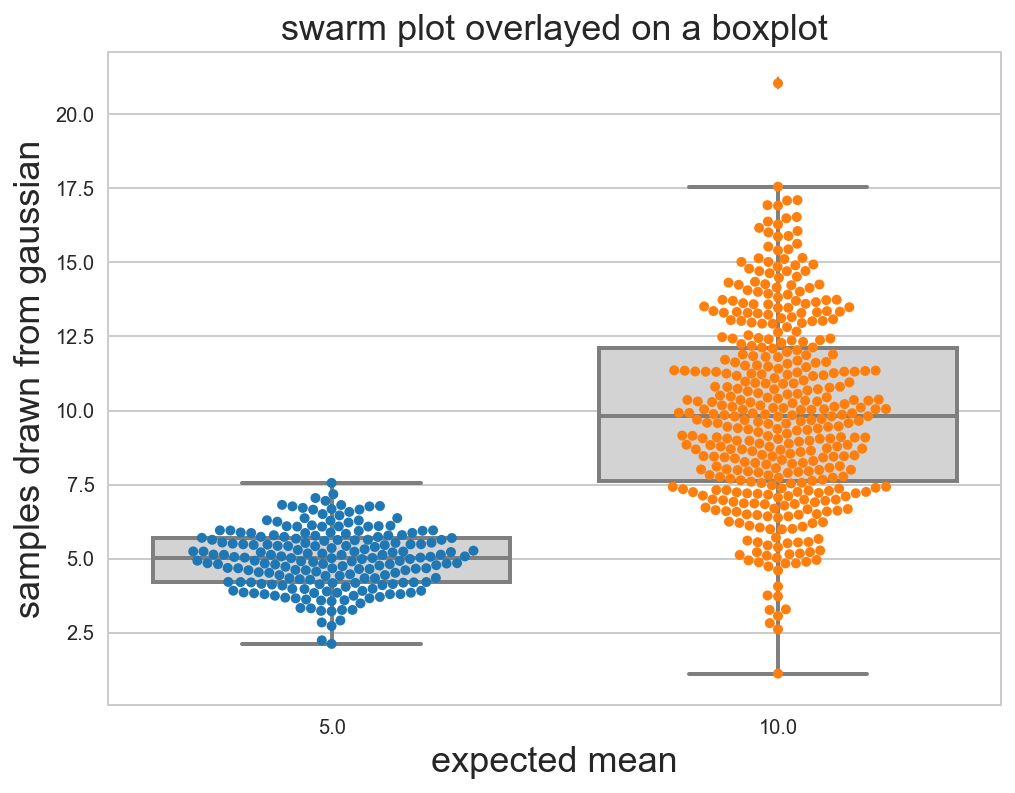

In [26]:
# Set up a figure with axes
fig, ax = plt.subplots(1, 1)

# Label the axes and title the plot
ax.set_xlabel('expected mean')
ax.set_ylabel('samples drawn from gaussian')
ax.set_title('swarm plot overlayed on a boxplot')

# Make a swarm plot
sns.swarmplot(x, y, ax=ax)

# Make a box plot
sns.boxplot(x, y, color='lightgray', ax=ax);

While the swarm plot overlayed on the box plot is informative, I think you could just plot the swarm plot. However, with the box plot we do get additional information, specifically the quartiles, which may not have been clear in our swarmplot.

So far we have focused on scatter plots, box plots, strip plots (jitter plots), and swarm plots. To investigate how to make line plots, we'll load the zebrafish data set, which you can get [here](http://bebi103.caltech.edu.s3-website-us-east-1.amazonaws.com/2017/data/130315_1A_aanat2_resampled.csv).

In [27]:
df_zf = pd.read_csv('../data/130315_1A_aanat2_resampled.csv')

# Take a look as a reminder
df_zf.head()

,location,time,activity,zeit,zeit_ind,day,genotype,light
0,1,2013-03-15 18:30:00,85.888889,-14.500000,-869,4,het,True
1,1,2013-03-15 18:40:00,4.500000,-14.333333,-860,4,het,True
2,1,2013-03-15 18:50:00,0.000000,-14.166667,-850,4,het,True
3,1,2013-03-15 19:00:00,0.000000,-14.000000,-840,4,het,True
4,1,2013-03-15 19:10:00,0.000000,-13.833333,-830,4,het,True


We'll pull out just one wild type fish, and then plot the activity over time using `plt.plot()`.

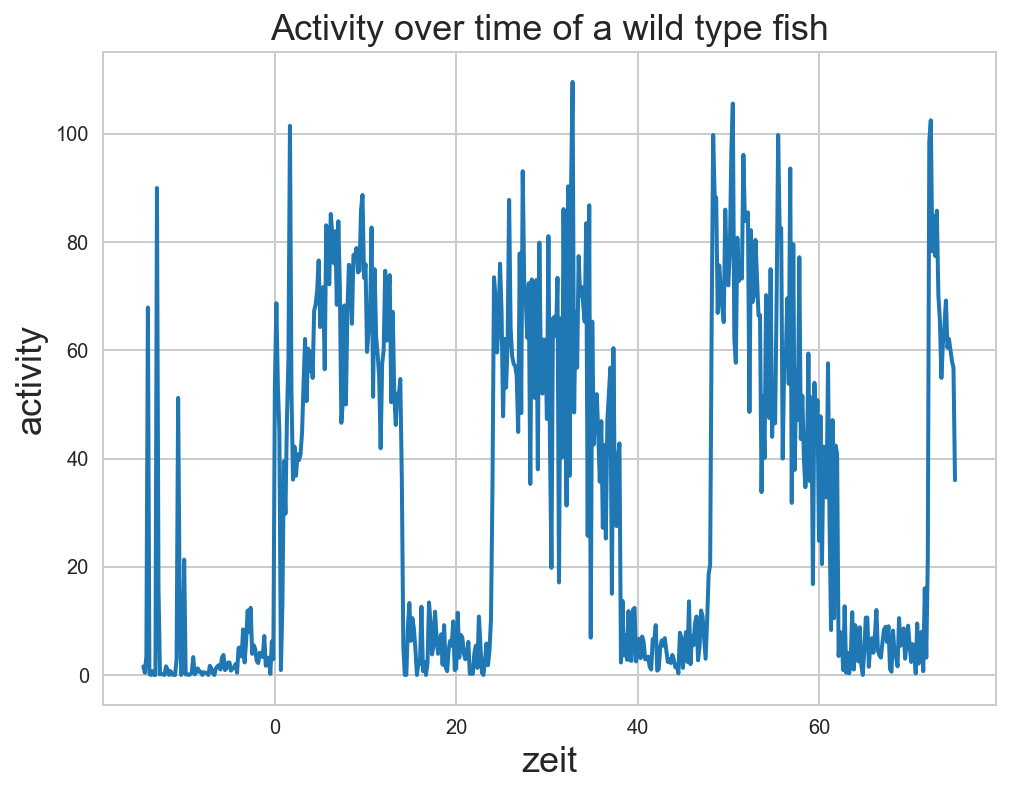

In [29]:
# Pull out the fish we want
wt = df_zf['genotype'] == 'wt'
fish = df_zf['location'] == 2

# Set up a figure with one set of axes
fig, ax = plt.subplots(1, 1)

# Label the axes and title the plot
ax.set_xlabel('zeit')
ax.set_ylabel('activity')
ax.set_title('Activity over time of a wild type fish')

# Populate the plot
ax.plot(df_zf.loc[wt & fish, 'zeit'], df_zf.loc[wt & fish, 'activity']);

Let's try all the wild type fish.

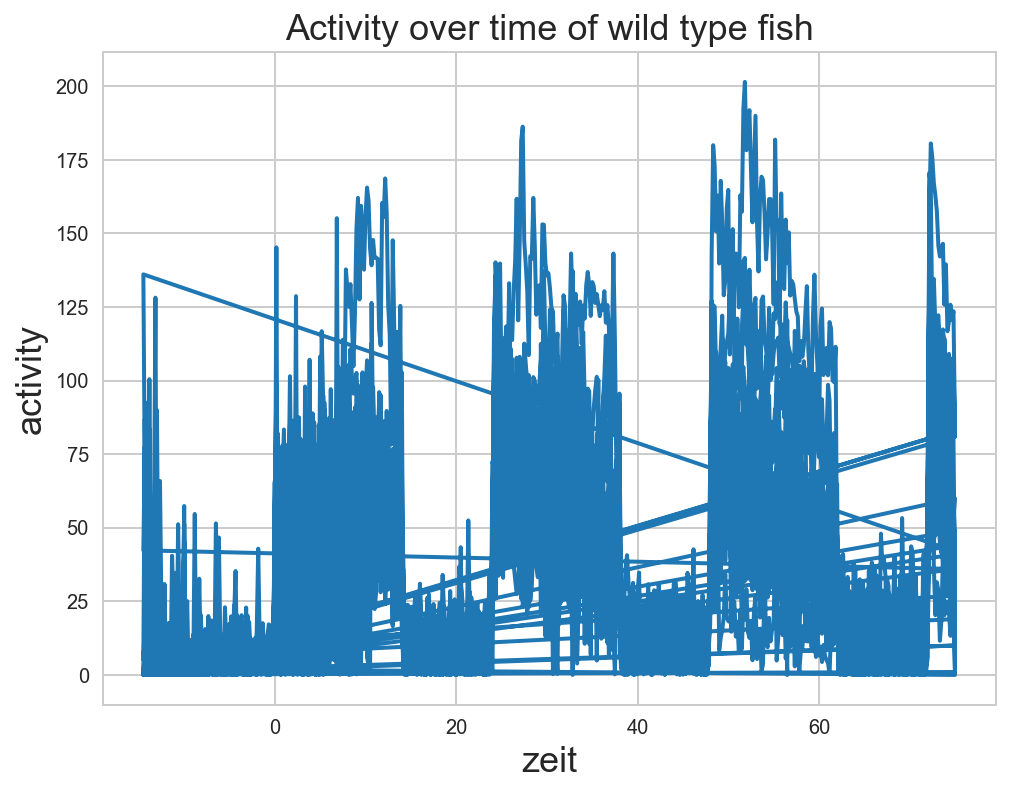

In [31]:
# Get all wt fish
wt = df_zf['genotype'] == 'wt'

# Set up a figure with one set of axes
fig, ax = plt.subplots(1, 1)

# Label the axes and title the plot
ax.set_xlabel('zeit')
ax.set_ylabel('activity')
ax.set_title('Activity over time of wild type fish')

ax.plot(df_zf.loc[wt, 'zeit'], df_zf.loc[wt, 'activity']);

Oh no! We have lines connecting the end of one trace with the start of another, and we can't really see anything. To address this we can loop through each fish and make the lines transparent and thinner.

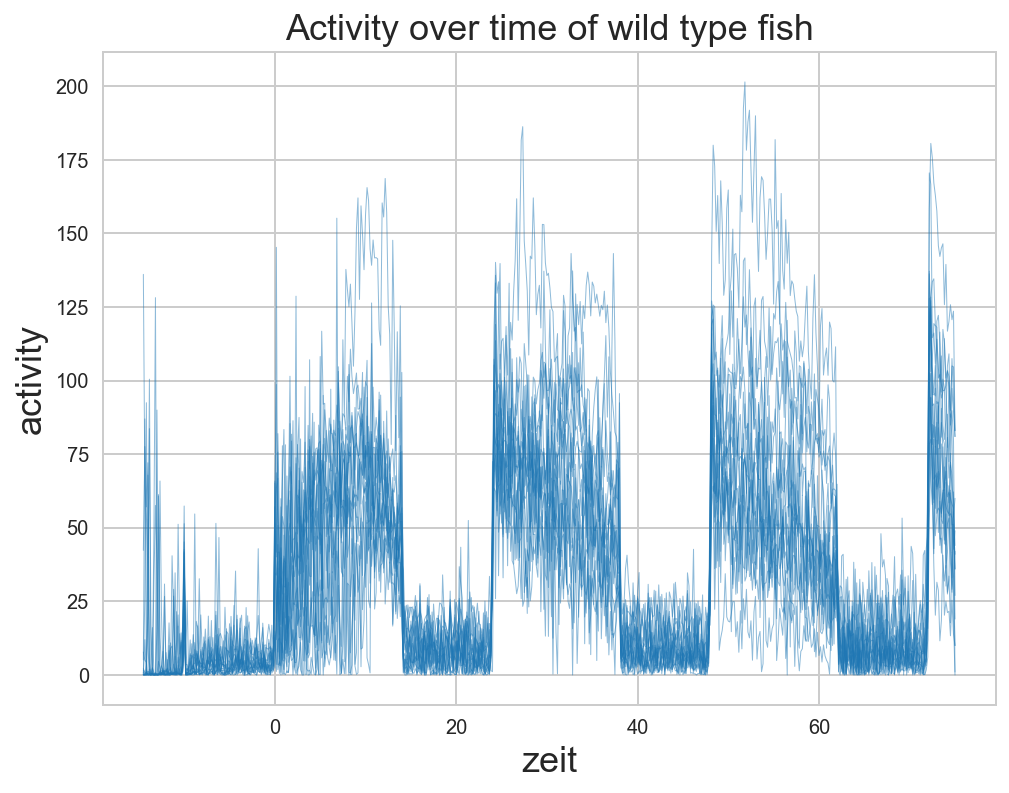

In [32]:
# Set up a figure with one set of axes
fig, ax = plt.subplots(1, 1)

# Label the axes and title the plot
ax.set_xlabel('zeit')
ax.set_ylabel('activity')
ax.set_title('Activity over time of wild type fish')

# Loop through all wild type fish and plot
for i in df_zf['location'].unique():
    wt = df_zf['genotype'] == 'wt'
    fish = df_zf['location'] == i
    
    ax.plot(df_zf.loc[wt & fish, 'zeit'],
            df_zf.loc[wt & fish, 'activity'],
            color='#1f77b4',
            alpha=.5,
            linewidth=.5)

That's better. We can also save a figure easily using `plt.savefig()`. Here we will save it as a pdf and a svg. Matplotlib will automatically infer the type of output based on the suffix of the file name.

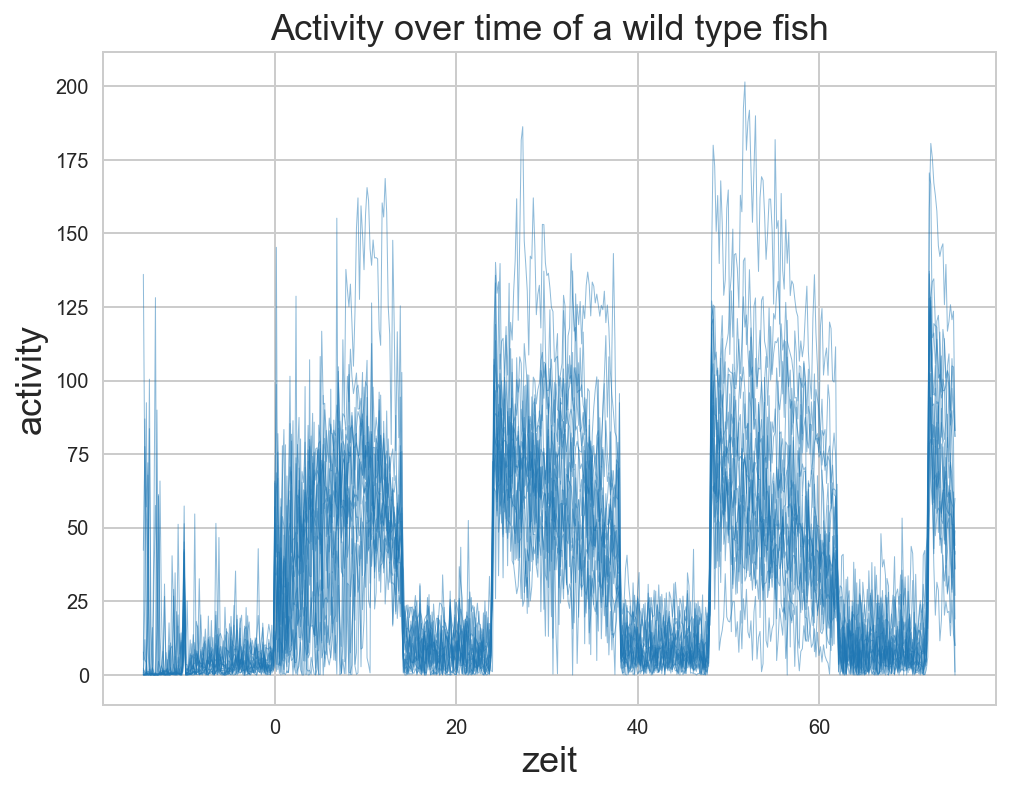

In [33]:
# Set up a figure with one set of axes
fig, ax = plt.subplots(1, 1)

# Label the axes and title the plot
ax.set_xlabel('zeit')
ax.set_ylabel('activity')
ax.set_title('Activity over time of a wild type fish')

# Loop through all wild type fish and plot
for i in df_zf['location'].unique():
    wt = df_zf['genotype'] == 'wt'
    fish = df_zf['location'] == i
    
    ax.plot(df_zf.loc[wt & fish, 'zeit'],
            df_zf.loc[wt & fish, 'activity'],
            color='#1f77b4',
            alpha=0.5,
            linewidth=0.5)

# Save figure
plt.savefig('fig.pdf')
plt.savefig('fig.svg')

## Matploblib as a backend for HoloViews

Now that we have explored some of what Matplotlib and Seaborn can offer, I will demonstrate that Matplotlib can be used as the backend for HoloViews. Again, we can make a scatter plot of the adhesive force versus impact force.

:Scatter   [impact force (mN)]   (adhesive force (mN),age)
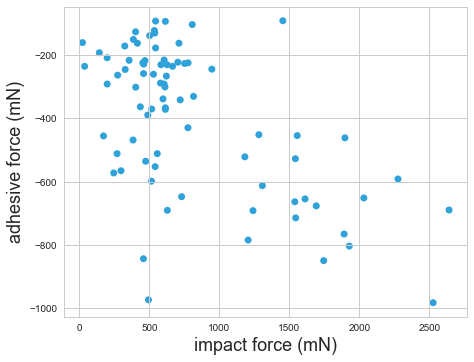

In [48]:
%%opts Scatter [fig_inches=8, aspect=1.3, show_frame=True, show_grid=True]

scatter = hv.Scatter(df_frog,
                     kdims=['impact force (mN)'], 
                     vdims=['adhesive force (mN)', 'age'])

scatter = bebi103.viz.adjust_range(scatter)
scatter

Holoviews has all the same capabilities regardless of which backend it uses, however, the options that you can pass in differ depending on the backend. Above, we used `fig_inches` to set the width of the plot in inches and `aspect` to set the aspect ratio (width/height). These two specifications replace the `width` and `height` specifications used with the Bokeh backend. 

We can still perform the groupby method, as demonstrated below.

:NdOverlay   [age]
   :Scatter   [impact force (mN)]   (adhesive force (mN),age)
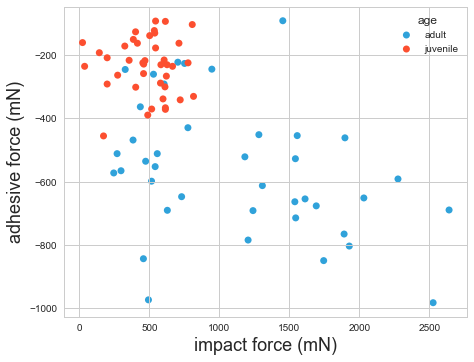

In [52]:
%%opts Scatter [fig_inches=8, aspect=1.3, show_frame=True, show_grid=True]
%%opts NdOverlay [fig_inches=8, aspect=1.3, show_frame=True, show_grid=True]

# Make groupby object
gb = scatter.groupby('age')

# Show the overlay
gb.overlay()

## Conclusions

Both Bokeh and Matplotlib are excellent tools for plotting, however, Bokeh is designed for interactivity in the browser while Matplotlib is not. In addition, as a result of their respective development histories, Bokeh has a more limited scope (basically populate glyphs on figures and arrange them with tools), whereas Matplotlib is more feature-rich, but has a more complicated set of functions and can therefore be harder to penetrate. Since either tool is great, I suggest you try them both to determine which you like better, or even use them both.